<a href="https://colab.research.google.com/github/MDYLL/Megafon_test/blob/master/Megafon_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [27]:
from google.colab import files
uploaded = files.upload()

Saving 02_Data.csv to 02_Data (1).csv


In [28]:
ls

'02_Data (1).csv'   02_Data.csv   sample_data/


In [0]:
df=pd.read_csv('02_Data.csv',sep=';')

In [30]:
df.head()

,lac,cid,msisdn,imei,event_type,tstamp,long,lat,max_dist,cell_type,start_angle,end_angle
0,5029,40798,158529599791,3.531111e+14,0,1369252800974,37.9305,55.7815,2101,OUTDOOR,220.0,280.0
1,7782,56870,158520145943,1.292900e+13,5,1369252801396,37.4239,55.7426,2,OUTDOOR,45.0,105.0
2,7794,32226,158521798391,3.519940e+14,5,1369252802013,37.7034,55.5803,1125,OUTDOOR,0.0,60.0
3,7758,33528,158537830573,3.586270e+14,0,1369252802331,37.7895,55.7042,1158,OUTDOOR,210.0,270.0
4,5060,17568,158510204039,3.524581e+14,8,1369252803586,37.1900,55.8308,500,OUTDOOR,180.0,240.0


In [31]:
df.shape[0]

174123

In [32]:
pd.to_datetime(df.tstamp.min(), unit='ms'),pd.to_datetime(df.tstamp.max(), unit='ms')

(Timestamp('2013-05-22 20:00:00.974000'),
 Timestamp('2013-05-30 16:29:37.643000'))

In [33]:
pd.to_datetime(1369409228852, unit='ms')

Timestamp('2013-05-24 15:27:08.852000')

In [0]:
df=df.drop(['lac','cid','imei','event_type','max_dist','cell_type','start_angle','end_angle'],axis=1)

In [0]:
df.tstamp//=1000
df.tstamp-=df.tstamp.min(axis=0)

In [0]:
period=df.tstamp.max(axis=0)//1000
y=[]
for i in range(1000):
  y.append(df.loc[(df.tstamp>i*period)&(df.tstamp<=(i+1)*period)].shape[0])

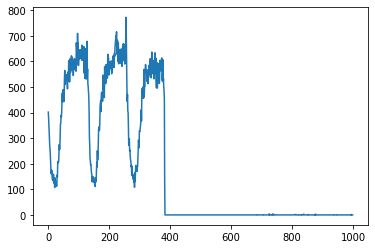

In [37]:
from matplotlib import pyplot as plt
plt.plot(y)
plt.show()

In [38]:
unique_numbers=df['msisdn'].unique()
len(unique_numbers)

2361

In [0]:
quantity_time_intervals=100
min_tstamp=df.tstamp.min(axis=0)
max_tstamp=df.tstamp.max(axis=0)
time_period=(max_tstamp-min_tstamp)//quantity_time_intervals
# time_intervals=[el for el in range(0,max_tstamp,time_period)]
df_norm=pd.DataFrame(columns=df.columns)

In [40]:
df

,msisdn,tstamp,long,lat
0,158529599791,0,37.9305,55.7815
1,158520145943,1,37.4239,55.7426
2,158521798391,2,37.7034,55.5803
3,158537830573,2,37.7895,55.7042
4,158510204039,3,37.1900,55.8308
...,...,...,...,...
174118,158503851673,673967,37.6178,55.7370
174119,158503851673,674287,37.6217,55.7363
174120,158503851673,675316,37.6217,55.7363
174121,158503851673,678091,37.7856,55.7508


In [41]:
min_tstamp,max_tstamp,time_period

(0, 678577, 6785)

In [0]:
import collections
current_tstamp=collections.defaultdict(tuple)
for number in unique_numbers:
  df1=df.loc[df.msisdn==number]
  idx=df1.tstamp.idxmax()
  current_tstamp[number]=(df.at[idx,'long'],df.at[idx,'lat'])


In [0]:
df_norm=pd.DataFrame(columns=df.columns)
for number in unique_numbers:
  for i in range(0,quantity_time_intervals):
    # print(i,end=' ')
  
  # for j in range(1):
    # number=158529599791
    # if i==18:
    #   break
    df1=df.loc[(df.msisdn==number)&(df.tstamp<=max_tstamp-i*time_period)&(df.tstamp>max_tstamp-(i+1)*time_period)]
    if df1.size>0:
      idx=df1.tstamp.idxmax()
      df_norm=df_norm.append({'msisdn':number,'tstamp':i,'long':df1.at[idx,'long'],'lat':df1.at[idx,'lat']},ignore_index=True)
      # print(i,number,df1.at[idx,'long'])
      # df_norm.at[idx,'tstamp']=max_tstamp-i*time_period
      current_tstamp[number]=(df1.at[idx,'long'],df1.at[idx,'lat'])
      # if number==158510204039:
      #   print(df1.shape)
      #   print(idx)
      #   print(i,current_tstamp[number])
    else:
      # print('**************')
      # print(i)
      # df_norm=df_norm.append({'msisdn':number,'tstamp':max_tstamp-i*time_period,'long':current_tstamp[number][0],'lat':current_tstamp[number][1]},ignore_index=True)
      df_norm=df_norm.append({'msisdn':number,'tstamp':i,'long':current_tstamp[number][0],'lat':current_tstamp[number][1]},ignore_index=True)
      # print(i,number)

In [0]:
df_norm=df_norm.astype({'msisdn':int,'tstamp':int})
df_norm.loc[df_norm.msisdn==158529599791]


In [0]:
import torch
(int(len(unique_numbers)*(len(unique_numbers)-1)/2),2*2*quantity_time_intervals)

In [0]:
x=torch.zeros((int(len(unique_numbers)*(len(unique_numbers)-1)/2),2*2*quantity_time_intervals))

In [0]:
x.shape

In [0]:
idx=0
for i in unique_numbers:
  print(i,end=' ')
  for j in unique_numbers:
    if i<=j:
      continue
    t1=torch.FloatTensor(df_norm.loc[df_norm.msisdn==i]['long'].values,)
    t2=torch.FloatTensor(df_norm.loc[df_norm.msisdn==i]['lat'].values)
    t3=torch.FloatTensor(df_norm.loc[df_norm.msisdn==j]['long'].values)
    t4=torch.FloatTensor(df_norm.loc[df_norm.msisdn==j]['lat'].values)
    t=torch.cat([t1,t2,t3,t4])
    x[idx]=t
    idx+=1
    
    

In [0]:
x

In [0]:
x.shape

In [0]:
pair=[]
idx=0
for i in unique_numbers:
  # print(i,end=' ')
  for j in unique_numbers:
    if i<=j:
      continue
    pair.append((i,j))
    # idx+=1


In [0]:
pair_back={(pair[i][0],pair[i][1]):i for i in range(len(pair))}

In [0]:
uploaded = files.upload()

In [0]:
df=pd.read_csv('facts.csv',sep=';')

In [0]:
label=[]
for row in df.iterrows():
  label.append((max(row[1][0],row[1][1]),min(row[1][0],row[1][1])))

In [0]:
true_label=[]
for el in label:
  try:
    num=pair_back[el]
    true_label.append(el)
  except:
    print(el)

In [0]:
label=true_label
len(label)

In [0]:
numbers_of_labels=[]
for el in label:
  numbers_of_labels.append(pair_back[el])

In [0]:
numbers_of_labels[0:3]

In [0]:
x_label=x[numbers_of_labels]
x_label.shape

In [0]:
x0=torch.zeros((x.shape[0],1))
for i in range(x0.shape[0]):
  if i in numbers_of_labels:
    x0[i][0]=1

In [0]:
import numpy as np
x_fake=torch.zeros((1200000,x.shape[1]))
for i in range(len(numbers_of_labels)):
  for j in range(10000):
    x_fake[i*10000+j]=x[numbers_of_labels[i]]+np.random.sample(1)/1000


In [0]:
x1=torch.ones((x_fake.shape[0]),1)
x_fake1=torch.cat((x_fake,x1),dim=1)
x_fake1[0][-1]

In [0]:
no_label=list(set(range(x.shape[0]))-set(numbers_of_labels))

In [0]:
len(no_label)

In [0]:
numbers_of_labels[0] in no_label

In [0]:
x_with_labels=torch.cat((x,x0),dim=1)

In [0]:
x_with_labels[numbers_of_labels[0]][-1]

In [0]:
x1=x_with_labels[torch.randperm(x_with_labels.shape[0])]
x2=x1[:int(x_with_labels.shape[0]*0.8)]
x3=x1[int(x_with_labels.shape[0]*0.8):]

In [0]:
sum(x2[:,-1]),sum(x3[:,-1])

In [0]:
x4=torch.cat((x2,x_fake1),dim=0)

In [0]:
X_train=x4[:,:-1]
X_test=x3[:,:-1]
y_train=x4[:,-1].long()
y_test=x3[:,-1].long()

In [0]:
y_train

In [0]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

In [0]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train.to(device)

In [0]:
class MegafonNet(torch.nn.Module):
  def __init__(self,n_hidden_neurons):
    super(MegafonNet,self).__init__()

    self.fc1=torch.nn.Linear(quantity_time_intervals*4,n_hidden_neurons)
    self.activ1=torch.nn.LeakyReLU()
    self.fc2=torch.nn.Linear(n_hidden_neurons,n_hidden_neurons)
    self.activ2=torch.nn.Tanh()
    self.fc3=torch.nn.Linear(n_hidden_neurons,2)
    self.sm = torch.nn.Softmax(dim=1)
  
  def forward(self,x):
    x=self.fc1(x)
    x=self.activ1(x)
    x=self.fc2(x)
    x=self.activ2(x)
    x=self.fc3(x)
    return x

megafon_net=MegafonNet(100)

In [0]:
loss = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(megafon_net.parameters(), 
                             lr=1.0e-3)

In [0]:
batch_size = 100

for epoch in range(50000):
    order = torch.randperm(len(X_train))
    total_loss=0
    iter=0
    for start_index in range(0, len(X_train), batch_size):
        # print(start_index/len(X_train))
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        x_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        
        preds = megafon_net.forward(x_batch) 
        
        loss_value = loss(preds, y_batch)
        total_loss+=loss_value
        iter+=1
        loss_value.backward()
        
        optimizer.step()
        
    if epoch % 1 == 0:
        test_preds = megafon_net.forward(X_test)
        print("train loss=",total_loss/iter)
        print("test loss=",loss(megafon_net.forward(X_test),y_test))
        test_preds = test_preds.argmax(dim=1)
        accuracy=((test_preds == y_test).float().mean())
        print("test accuracy=",accuracy)
        

In [0]:
y_test.argmax()

In [0]:
y_test[549947],test_preds[549947]

In [0]:
y_batch

In [0]:
preds